In [21]:
from utils import *

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, mannwhitneyu

In [3]:
SNR = 100.0
PARCELLATION = 'HCPMMP1_combined'
DATA_PATH = '/home/williamtheodor/Documents/DL for EEG Classification/data/'

data_dict = load_mmidb_data_dict(DATA_PATH, PARCELLATION, SNR, chop=False)

In [7]:
subjects_dir, subject, trans, src_path, bem_path = get_fsaverage()
labels = get_labels(subjects_dir, parcellation_name=PARCELLATION)
label_names = [label.name for label in np.array(labels).flatten()]

visual_indices = [i for i, label in enumerate(label_names) if 'Visual' in label]
visual_indices

[3, 6, 11, 18, 22, 26, 29, 34, 41, 45]

In [8]:
label_names[visual_indices]

TypeError: list indices must be integers or slices, not list

In [16]:
patients_to_exclude = ['S088', 'S089', 'S090', 'S092', 'S104', 'S106']

open = []
closed = []

for patient in data_dict['Alpha'].keys():
    if patient not in patients_to_exclude:
        open_temp = data_dict['Alpha'][patient][patient+'R01']['T0'][0]
        open_temp = np.array([open_temp[i] for i in visual_indices])
        open.append(open_temp.mean())
        
        closed_temp = data_dict['Alpha'][patient][patient+'R02']['T0'][0]
        closed_temp = np.array([closed_temp[i] for i in visual_indices])
        closed.append(closed_temp.mean())

46

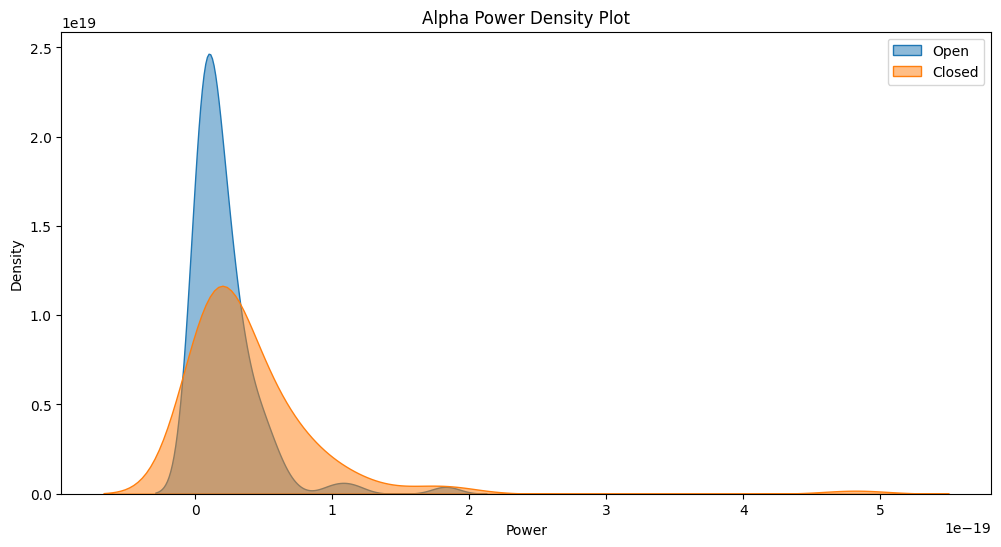

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_title('Alpha Power Density Plot')
ax.set_xlabel('Power')
ax.set_ylabel('Density')

sns.kdeplot(open, fill=True, alpha=0.5, label='Open', ax=ax)
sns.kdeplot(closed, fill=True, alpha=0.5, label='Closed', ax=ax)

ax.legend()
plt.show()


In [22]:
ttest_ind(open, closed)

Ttest_indResult(statistic=-3.2231127565192756, pvalue=0.001476355073499251)

In [23]:
mannwhitneyu(open, closed)

MannwhitneyuResult(statistic=3672.0, pvalue=0.00013621278901218578)